
# PyCaret Multiclass Classification of Wine Quality


In [1]:
#IMPORT DATASET
import pandas as pd

df = pd.read_csv('winequality-white.csv', delimiter=';')

## Setup

In [2]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df, target = 'quality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


## Compare Models

In [3]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6666,0.3417,0.6666,0.6741,0.6527,0.4778,0.4855,1.0450
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6718,0.6509,0.4743,0.4828,0.5050
catboost,CatBoost Classifier,0.6488,0.3315,0.6488,0.6518,0.6387,0.4584,0.4623,13.4100
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.9060
lightgbm,Light Gradient Boosting Machine,0.6389,0.3302,0.6389,0.6365,0.6287,0.4447,0.4477,5.0790
gbc,Gradient Boosting Classifier,0.5747,0.0000,0.5747,0.5723,0.5577,0.3312,0.3389,4.6470
dt,Decision Tree Classifier,0.5694,0.2710,0.5694,0.5688,0.5682,0.3630,0.3633,0.0630
lda,Linear Discriminant Analysis,0.5236,0.0000,0.5236,0.5076,0.4988,0.2412,0.2513,0.0370
ridge,Ridge Classifier,0.5216,0.0000,0.5216,0.4512,0.4478,0.1941,0.2216,0.0370
lr,Logistic Regression,0.5128,0.0000,0.5128,0.4676,0.4656,0.1994,0.2145,1.6050


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## Analyze Model

We will use `plot_model` function to analyzes the performance of the trained model on the test set.

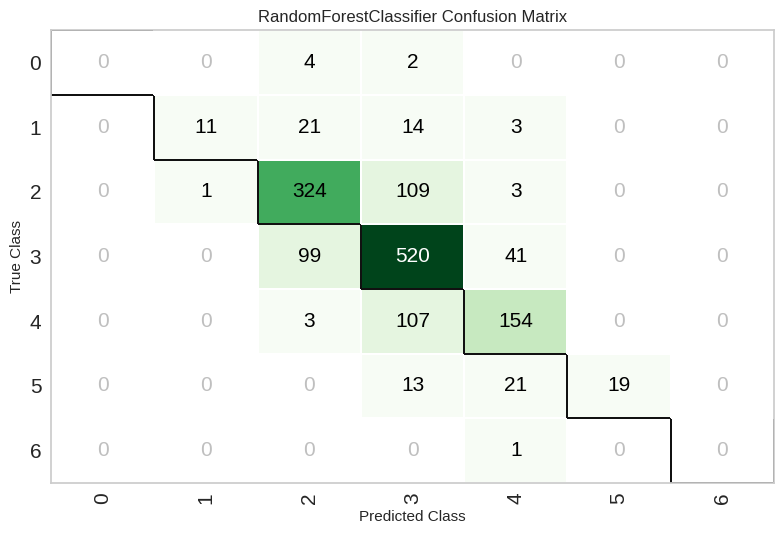

In [4]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

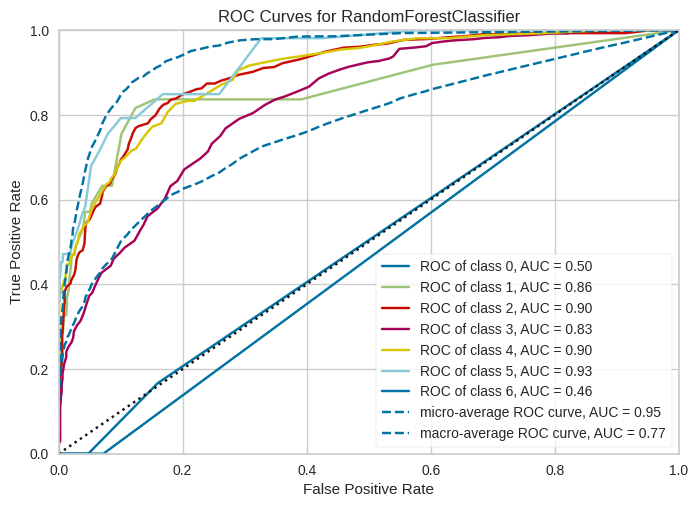

In [5]:
# plot AUC
plot_model(best, plot = 'auc')

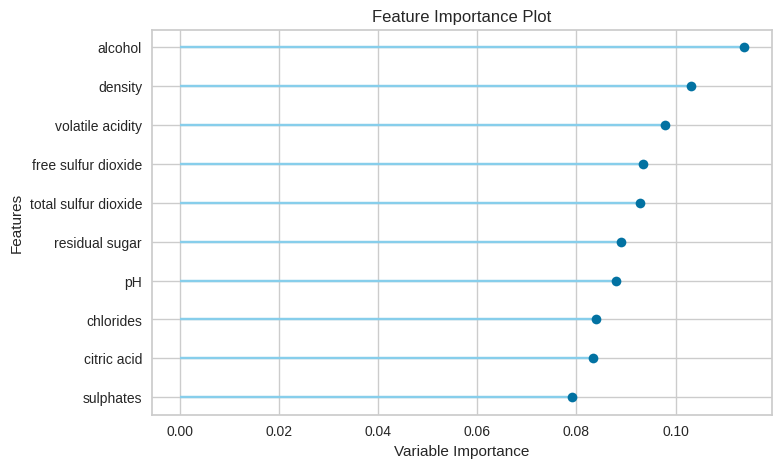

In [6]:
# plot feature importance
plot_model(best, plot = 'feature')

## Prediction

In [7]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6993,0.8659,0.6993,0.7094,0.6892,0.5354,0.5390


In [8]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
139,8.1,0.28,0.39,1.9,0.029,18.0,79.0,0.99230,3.23,0.52,11.8,6,6,0.51
4620,6.4,0.38,0.19,4.5,0.038,36.0,119.0,0.99151,3.07,0.42,11.2,6,6,0.51
1689,7.1,0.16,0.25,1.3,0.034,28.0,123.0,0.99150,3.27,0.55,11.4,6,7,0.42
2724,7.5,0.18,0.31,6.5,0.029,53.0,160.0,0.99276,3.03,0.38,10.9,6,6,0.61
3812,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,5,5,0.77


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [9]:
# copy data and drop Class variable

new_data = df.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [10]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction_label,prediction_score
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.74
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.95
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.92
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.95
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.95


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [11]:
# save pipeline
save_model(best, 'wine_quality_classification_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

In [12]:
# load pipeline
loaded_best_pipeline = load_model('wine_quality_classification_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

# Detailed function-by-function overview

## ✅ Setup
This function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [13]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [14]:
# lets access X_train_transformed
get_config('X_train_transformed')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2146,7.2,0.115,0.30,6.800000,0.056,26.0,105.0,0.99540,3.44,0.40,9.6
2095,8.4,0.280,0.40,8.900000,0.048,33.0,146.0,0.99880,3.40,0.46,9.3
2671,5.9,0.300,0.30,2.000000,0.030,38.0,142.0,0.98892,3.41,0.41,12.9
875,7.1,0.210,0.32,2.200000,0.037,28.0,141.0,0.99300,3.20,0.57,10.0
3973,6.3,0.270,0.51,7.600000,0.049,35.0,200.0,0.99548,3.16,0.54,9.4
...,...,...,...,...,...,...,...,...,...,...,...
4393,6.4,0.180,0.28,17.049999,0.047,53.0,139.0,0.99724,3.25,0.35,10.5
2151,7.7,0.280,0.35,15.300000,0.056,31.0,117.0,0.99980,3.27,0.50,9.6
1257,6.4,0.170,0.27,6.700000,0.036,88.0,223.0,0.99480,3.28,0.35,10.2
619,7.4,0.190,0.30,1.400000,0.057,33.0,135.0,0.99300,3.12,0.50,9.6


In [15]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [16]:
# init setup with normalize = True

s = setup(df, target = 'quality', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


<Axes: >

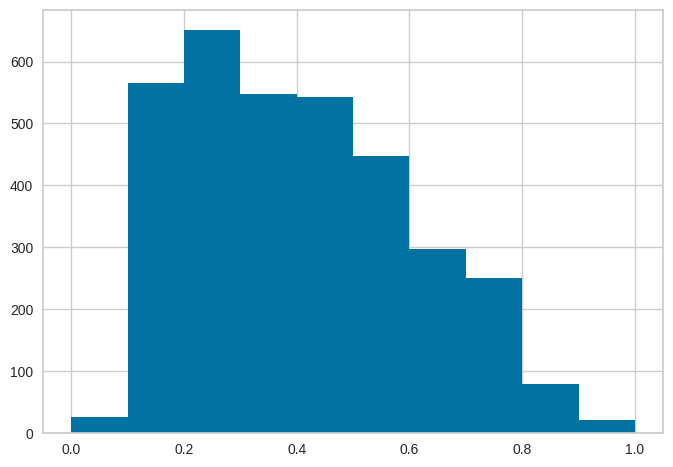

In [17]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['alcohol'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

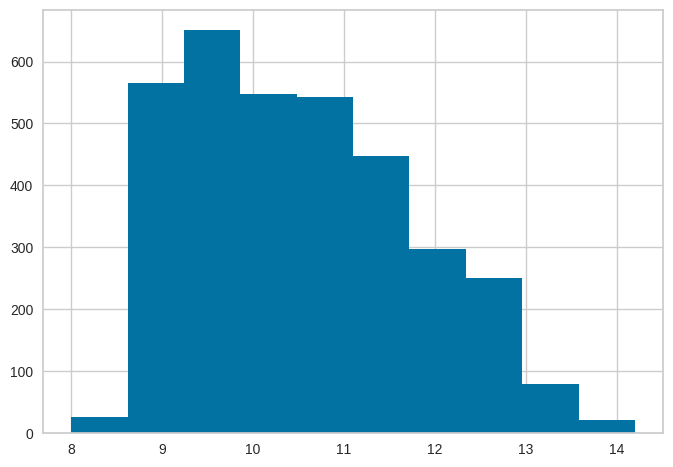

In [18]:
get_config('X_train')['alcohol'].hist()

## ✅ Compare Models
This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [19]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6660,0.3416,0.6660,0.6739,0.6522,0.4770,0.4846,0.8370
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6713,0.6510,0.4747,0.4830,0.6490
catboost,CatBoost Classifier,0.6488,0.3315,0.6488,0.6518,0.6387,0.4584,0.4623,13.5380
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.6900
lightgbm,Light Gradient Boosting Machine,0.6400,0.3308,0.6400,0.6370,0.6294,0.4455,0.4490,4.5570
gbc,Gradient Boosting Classifier,0.5750,0.0000,0.5750,0.5728,0.5581,0.3318,0.3395,4.5250
dt,Decision Tree Classifier,0.5706,0.2706,0.5706,0.5701,0.5694,0.3646,0.3648,0.0920
knn,K Neighbors Classifier,0.5432,0.2871,0.5432,0.5255,0.5287,0.2984,0.3004,0.0960
lr,Logistic Regression,0.5277,0.0000,0.5277,0.4943,0.4778,0.2192,0.2387,0.1160
lda,Linear Discriminant Analysis,0.5239,0.0000,0.5239,0.5079,0.4991,0.2416,0.2518,0.0440


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [20]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [21]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6660,0.3416,0.6660,0.6739,0.6522,0.4770,0.4846,0.7510
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6713,0.6510,0.4747,0.4830,0.8130
catboost,CatBoost Classifier,0.6488,0.3315,0.6488,0.6518,0.6387,0.4584,0.4623,13.1990
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.8370
lightgbm,Light Gradient Boosting Machine,0.6400,0.3308,0.6400,0.6370,0.6294,0.4455,0.4490,7.5980
gbc,Gradient Boosting Classifier,0.5750,0.0000,0.5750,0.5728,0.5581,0.3318,0.3395,4.2870
dt,Decision Tree Classifier,0.5706,0.2706,0.5706,0.5701,0.5694,0.3646,0.3648,0.0740


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [22]:
compare_tree_models

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [23]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6660,0.3416,0.6660,0.6739,0.6522,0.4770,0.4846,0.751
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6713,0.6510,0.4747,0.4830,0.813
catboost,CatBoost Classifier,0.6488,0.3315,0.6488,0.6518,0.6387,0.4584,0.4623,13.199
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.837
lightgbm,Light Gradient Boosting Machine,0.6400,0.3308,0.6400,0.6370,0.6294,0.4455,0.4490,7.598
gbc,Gradient Boosting Classifier,0.5750,0.0000,0.5750,0.5728,0.5581,0.3318,0.3395,4.287
dt,Decision Tree Classifier,0.5706,0.2706,0.5706,0.5701,0.5694,0.3646,0.3648,0.074


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `Recall`.

In [24]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6660,0.3416,0.6660,0.6739,0.6522,0.4770,0.4846,0.7450
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6713,0.6510,0.4747,0.4830,0.7560
catboost,CatBoost Classifier,0.6488,0.3315,0.6488,0.6518,0.6387,0.4584,0.4623,13.3750
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.6020
lightgbm,Light Gradient Boosting Machine,0.6400,0.3308,0.6400,0.6370,0.6294,0.4455,0.4490,6.6930
gbc,Gradient Boosting Classifier,0.5750,0.0000,0.5750,0.5728,0.5581,0.3318,0.3395,4.3040
dt,Decision Tree Classifier,0.5706,0.2706,0.5706,0.5701,0.5694,0.3646,0.3648,0.1300
knn,K Neighbors Classifier,0.5432,0.2871,0.5432,0.5255,0.5287,0.2984,0.3004,0.1630
lr,Logistic Regression,0.5277,0.0000,0.5277,0.4943,0.4778,0.2192,0.2387,0.1110
lda,Linear Discriminant Analysis,0.5239,0.0000,0.5239,0.5079,0.4991,0.2416,0.2518,0.0430


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [25]:
# list of top 3 models by Recall
best_recall_models_top3

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_sc

## ✅ Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [26]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [27]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5277,0.0000,0.5277,0.5207,0.4810,0.2202,0.2392
1,0.5335,0.0000,0.5335,0.5026,0.4904,0.2346,0.2507
2,0.5335,0.0000,0.5335,0.4818,0.4729,0.2212,0.2470
3,0.5160,0.0000,0.5160,0.4761,0.4649,0.2003,0.2170
4,0.5539,0.0000,0.5539,0.5286,0.5002,0.2571,0.2848
5,0.5248,0.0000,0.5248,0.4766,0.4704,0.2131,0.2323
6,0.5131,0.0000,0.5131,0.4821,0.4573,0.1855,0.2087
7,0.5423,0.0000,0.5423,0.5140,0.4986,0.2476,0.2657
8,0.5234,0.0000,0.5234,0.4898,0.4853,0.2260,0.2377


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [28]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5277,0.0,0.5277,0.5207,0.4810,0.2202,0.2392
1,0.5335,0.0,0.5335,0.5026,0.4904,0.2346,0.2507
2,0.5335,0.0,0.5335,0.4818,0.4729,0.2212,0.2470
3,0.5160,0.0,0.5160,0.4761,0.4649,0.2003,0.2170
4,0.5539,0.0,0.5539,0.5286,0.5002,0.2571,0.2848
5,0.5248,0.0,0.5248,0.4766,0.4704,0.2131,0.2323
6,0.5131,0.0,0.5131,0.4821,0.4573,0.1855,0.2087
7,0.5423,0.0,0.5423,0.5140,0.4986,0.2476,0.2657
8,0.5234,0.0,0.5234,0.4898,0.4853,0.2260,0.2377


In [29]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5381,0.0000,0.5381,0.5345,0.4891,0.2366,0.2574
1,0.5337,0.0000,0.5337,0.4964,0.4822,0.2264,0.2486
2,0.5219,0.0000,0.5219,0.4919,0.4718,0.2104,0.2280
Mean,0.5312,0.0000,0.5312,0.5076,0.4810,0.2245,0.2447
Std,0.0068,0.0000,0.0068,0.0191,0.0071,0.0108,0.0123


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5160,0.0000,0.5160,0.4826,0.4626,0.1931,0.2148
1,0.5452,0.0000,0.5452,0.5253,0.4996,0.2503,0.2700
2,0.5423,0.0000,0.5423,0.4867,0.4732,0.2314,0.2621
3,0.5190,0.0000,0.5190,0.4562,0.4552,0.1995,0.2195
4,0.5452,0.0000,0.5452,0.5231,0.4881,0.2394,0.2683
5,0.5335,0.0000,0.5335,0.4907,0.4728,0.2229,0.2464
6,0.5102,0.0000,0.5102,0.4828,0.4480,0.1751,0.2010
7,0.5452,0.0000,0.5452,0.5099,0.4946,0.2473,0.2694
8,0.5292,0.0000,0.5292,0.4956,0.4863,0.2322,0.2459


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## ✅ Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [32]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.0000,0.5714,0.5741,0.5726,0.3652,0.3653
1,0.5685,0.0000,0.5685,0.5726,0.5700,0.3663,0.3665
2,0.5423,0.0000,0.5423,0.5391,0.5397,0.3159,0.3163
3,0.5948,0.0000,0.5948,0.5814,0.5857,0.3931,0.3935
4,0.6064,0.7079,0.6064,0.6072,0.6064,0.4171,0.4173
5,0.5831,0.6858,0.5831,0.5837,0.5830,0.3836,0.3838
6,0.5160,0.6344,0.5160,0.5142,0.5137,0.2849,0.2853
7,0.5714,0.6784,0.5714,0.5684,0.5687,0.3640,0.3643
8,0.5702,0.0000,0.5702,0.5736,0.5713,0.3676,0.3678


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5190,0.0000,0.5190,0.4781,0.4775,0.2237,0.2355
1,0.5219,0.0000,0.5219,0.4960,0.5008,0.2464,0.2513
2,0.5306,0.0000,0.5306,0.5252,0.4811,0.2251,0.2454
3,0.5131,0.0000,0.5131,0.4893,0.4732,0.2191,0.2282
4,0.5364,0.7190,0.5364,0.5189,0.5186,0.2738,0.2784
5,0.5423,0.7178,0.5423,0.5139,0.5089,0.2708,0.2786
6,0.5160,0.6918,0.5160,0.4883,0.4724,0.2070,0.2225
7,0.5394,0.6964,0.5394,0.5116,0.5036,0.2600,0.2710
8,0.5322,0.0000,0.5322,0.5336,0.5084,0.2690,0.2734


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [34]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [35]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.0000,0.5714,0.5741,0.5726,0.3652,0.3653
1,0.5685,0.0000,0.5685,0.5726,0.5700,0.3663,0.3665
2,0.5423,0.0000,0.5423,0.5391,0.5397,0.3159,0.3163
3,0.5948,0.0000,0.5948,0.5814,0.5857,0.3931,0.3935
4,0.6064,0.7079,0.6064,0.6072,0.6064,0.4171,0.4173
5,0.5831,0.6858,0.5831,0.5837,0.5830,0.3836,0.3838
6,0.5160,0.6344,0.5160,0.5142,0.5137,0.2849,0.2853
7,0.5714,0.6784,0.5714,0.5684,0.5687,0.3640,0.3643
8,0.5702,0.0000,0.5702,0.5736,0.5713,0.3676,0.3678


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [36]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5190,0.0000,0.5190,0.4781,0.4775,0.2237,0.2355
1,0.5219,0.0000,0.5219,0.4960,0.5008,0.2464,0.2513
2,0.5306,0.0000,0.5306,0.5252,0.4811,0.2251,0.2454
3,0.5131,0.0000,0.5131,0.4893,0.4732,0.2191,0.2282
4,0.5364,0.7190,0.5364,0.5189,0.5186,0.2738,0.2784
5,0.5423,0.7178,0.5423,0.5139,0.5089,0.2708,0.2786
6,0.5160,0.6918,0.5160,0.4883,0.4724,0.2070,0.2225
7,0.5394,0.6964,0.5394,0.5116,0.5036,0.2600,0.2710
8,0.5322,0.0000,0.5322,0.5336,0.5084,0.2690,0.2734


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [37]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [38]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'aci...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [39]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5306,0.0000,0.5306,0.5278,0.5237,0.2970,0.2974
1,0.4723,0.0000,0.4723,0.4720,0.4721,0.2198,0.2199
2,0.5190,0.0000,0.5190,0.5148,0.5164,0.2838,0.2838
3,0.5277,0.0000,0.5277,0.5069,0.5169,0.2877,0.2882
4,0.6093,0.7335,0.6093,0.6202,0.6066,0.4177,0.4180
5,0.5423,0.7156,0.5423,0.5410,0.5377,0.3108,0.3112
6,0.5190,0.6895,0.5190,0.5161,0.5140,0.2716,0.2728
7,0.5743,0.7195,0.5743,0.5802,0.5652,0.3561,0.3569
8,0.5468,0.0000,0.5468,0.5449,0.5449,0.3234,0.3237


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 3428 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## ✅ Ensemble Model

This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [40]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6122,0.0000,0.6122,0.6080,0.6063,0.4094,0.4113
1,0.6152,0.0000,0.6152,0.6146,0.6086,0.4138,0.4151
2,0.6122,0.0000,0.6122,0.5941,0.5903,0.3876,0.3961
3,0.6210,0.0000,0.6210,0.6284,0.6050,0.4207,0.4227
4,0.6152,0.7982,0.6152,0.6070,0.5959,0.4061,0.4084
5,0.6414,0.8035,0.6414,0.6430,0.6330,0.4462,0.4499
6,0.6006,0.7833,0.6006,0.5944,0.5917,0.3900,0.3918
7,0.5889,0.8057,0.5889,0.5818,0.5826,0.3761,0.3773
8,0.6579,0.0000,0.6579,0.6774,0.6473,0.4671,0.4729


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [41]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5510,0.0000,0.5510,0.5535,0.5510,0.3399,0.3402
1,0.5743,0.0000,0.5743,0.5747,0.5741,0.3724,0.3726
2,0.5481,0.0000,0.5481,0.5397,0.5422,0.3192,0.3203
3,0.5889,0.0000,0.5889,0.5771,0.5816,0.3874,0.3877
4,0.6297,0.0000,0.6297,0.6262,0.6270,0.4473,0.4475
5,0.5831,0.0000,0.5831,0.5807,0.5810,0.3776,0.3779
6,0.5335,0.0000,0.5335,0.5291,0.5306,0.3057,0.3059
7,0.5802,0.0000,0.5802,0.5792,0.5795,0.3817,0.3818
8,0.5877,0.0000,0.5877,0.5894,0.5879,0.3936,0.3937


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

## ✅ Blend Models

This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [42]:
# top 3 models based on recall
best_recall_models_top3

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_sc

In [43]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6822,0.0000,0.6822,0.6859,0.6745,0.5068,0.5128
1,0.6764,0.0000,0.6764,0.6796,0.6692,0.5002,0.5045
2,0.6210,0.0000,0.6210,0.6276,0.6071,0.4030,0.4114
3,0.6647,0.0000,0.6647,0.6750,0.6490,0.4800,0.4836
4,0.6793,0.8717,0.6793,0.6965,0.6620,0.4977,0.5045
5,0.6997,0.8684,0.6997,0.7147,0.6879,0.5291,0.5394
6,0.6589,0.8402,0.6589,0.6718,0.6443,0.4688,0.4745
7,0.6531,0.8551,0.6531,0.6502,0.6452,0.4657,0.4691
8,0.6667,0.0000,0.6667,0.6766,0.6567,0.4809,0.4874


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Random Forest Classifier',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic_cst=None,
                                                     n_estimators=100,
                                                     n_jobs...
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   n_estimators=100, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=123, verbose=0,
                                                   warm_start=False)),
                             ('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x787029b3a860>)],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

## ✅ Stack Models

This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [44]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6560,0.0000,0.6560,0.6547,0.6466,0.4678,0.4718
1,0.6851,0.0000,0.6851,0.6950,0.6775,0.5152,0.5182
2,0.6414,0.0000,0.6414,0.6388,0.6248,0.4369,0.4444
3,0.6910,0.0000,0.6910,0.6988,0.6742,0.5209,0.5247
4,0.7085,0.0000,0.7085,0.7236,0.6901,0.5436,0.5510
5,0.7085,0.0000,0.7085,0.7322,0.6974,0.5403,0.5553
6,0.6356,0.0000,0.6356,0.6489,0.6225,0.4347,0.4387
7,0.6793,0.0000,0.6793,0.6751,0.6703,0.5069,0.5105
8,0.6725,0.0000,0.6725,0.6824,0.6623,0.4902,0.4972


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Random Forest Classifier',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       monotonic_cst=None,
                                                       n_estimators=100...
                                <catboost.core.CatBoostClassifier object at 0x787029b6cd90>)],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- method
- restack
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [45]:
# help(stack_models)

## ✅ Plot Model

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

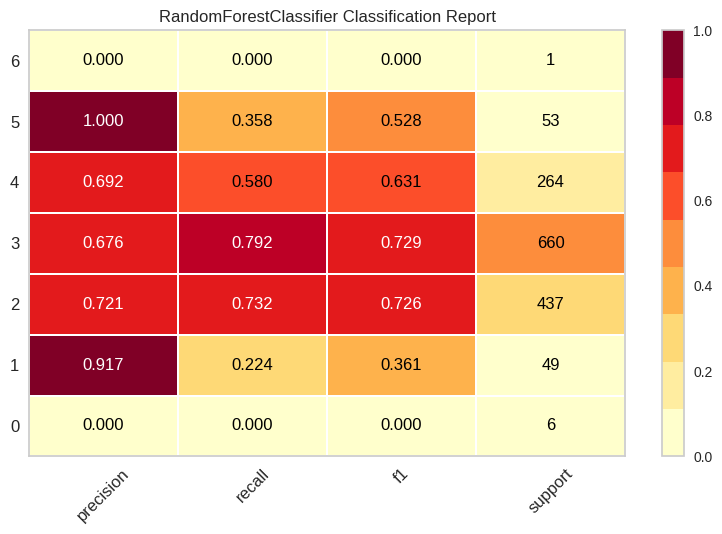

In [46]:
# plot class report
plot_model(best, plot = 'class_report')

In [47]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

## ✅ Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [48]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6268,0.0000,0.6268,0.6234,0.6187,0.4243,0.4291
1,0.6268,0.0000,0.6268,0.6248,0.6216,0.4302,0.4317
2,0.6181,0.0000,0.6181,0.6090,0.6039,0.4051,0.4101
3,0.6589,0.0000,0.6589,0.6624,0.6443,0.4758,0.4779
4,0.6531,0.8468,0.6531,0.6440,0.6359,0.4635,0.4666
5,0.6764,0.8278,0.6764,0.6812,0.6690,0.5002,0.5061
6,0.6472,0.8135,0.6472,0.6430,0.6340,0.4547,0.4596
7,0.6210,0.8197,0.6210,0.6136,0.6145,0.4232,0.4248
8,0.6345,0.0000,0.6345,0.6484,0.6302,0.4407,0.4428


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

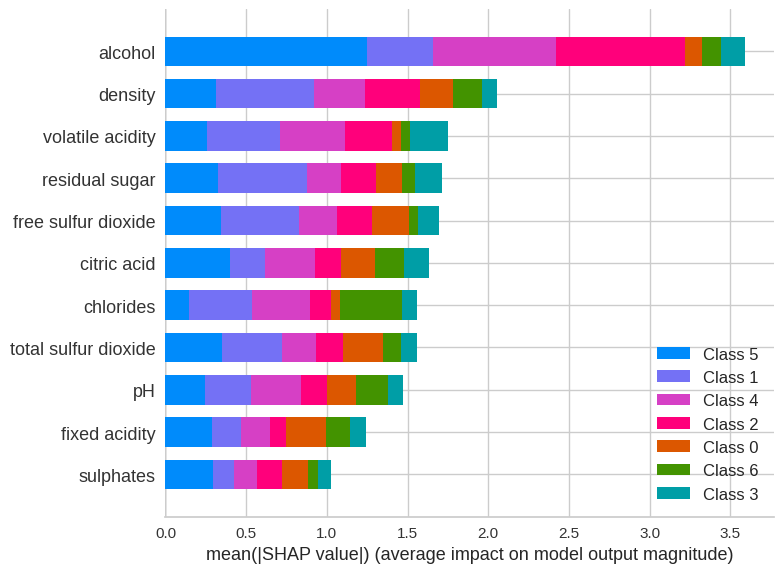

In [49]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [50]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [51]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/58 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.5277,0.0000,0.5277,0.4943,0.4778,0.2192,0.2387
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5432,0.2871,0.5432,0.5255,0.5287,0.2984,0.3004
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.4341,0.2681,0.4341,0.4641,0.4253,0.2081,0.2175
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5706,0.2706,0.5706,0.5701,0.5694,0.3646,0.3648
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.4944,0.0000,0.4944,0.3989,0.4206,0.1678,0.1911
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5216,0.0000,0.5216,0.4644,0.4477,0.1940,0.2217
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.6660,0.3416,0.6660,0.6739,0.6522,0.4770,0.4846
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.4685,0.0000,0.4685,0.4890,0.4567,0.2509,0.2619
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.4300,0.0000,0.4300,0.3611,0.3685,0.0977,0.1115


In [52]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                                                 <catboost.core.CatBoostClassifier object at 0x786f1ba6cb80>)],
                                    final_estimator=LogisticRegression(C=1.0,
                                                                       class_weight=None,
                                                                       dual=False,
                                                                       fit_intercept=True,
                                                                       intercept_scaling=1,
                                                                       l1_ratio=None,
                                                                       max_iter=1000,
                                                                       multi_class='auto',
                                                                       n_jobs=None,
                                                                       penalty='l2',
                                                                       random_state=123,
                                                                       solver='lbfgs',
                                                                       tol=0.0001,
                                                                       verbose=0,
                                                                       warm_start=False),
                                    n_jobs=-1, passthrough=False,
                                    stack_method='auto', verbose=0)]],
         verbose=False)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [53]:
automl()

StackingClassifier(cv=5,
                   estimators=[('Random Forest Classifier',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       monotonic_cst=None,
                                                       n_estimators=100...
                                <catboost.core.CatBoostClassifier object at 0x786f1bb34a30>)],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

## ✅Create App
This function creates a basic gradio app for inference.

In [54]:
# create gradio app
create_app(best)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


2024/12/01 19:15:41 [W] [service.go:132] login to server failed: dial tcp 44.237.78.176:7000: connect: connection refused


<IPython.core.display.Javascript object>

## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [55]:
# create api
create_api(best, api_name = 'wine_quality_classification_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python wine_quality_classification_api.py


In [56]:
# check out the .py file created with this magic command
%load wine_quality_classification_api.py

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [57]:
final_best = finalize_model(best)

In [58]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [59]:
# save model
save_model(best, 'my_wine_classification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

In [60]:
# load model
loaded_from_disk = load_model('my_wine_classification_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [61]:
# save experiment
save_experiment('my_experiment')

In [62]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=df)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True
